### This is the main Notebook where I import from all Libraries and call all required functions

In [2]:
from get_trends_data import get_top_n_trending, create_table
import pandas as pd

In [3]:
top_5_trending = get_top_n_trending()

In [4]:
df = create_table(top_5_trending)

In [5]:
df['timestamp'] = pd.to_datetime(df.timestamp.str.removesuffix('00'), format="%Y%m%d")
df.head()

,article,timestamp,views
0,Microsoft_Windows,2023-05-13,16948
1,Microsoft_Windows,2023-05-14,16281
2,Microsoft_Windows,2023-05-15,18138
3,Microsoft_Windows,2023-05-16,18752
4,Microsoft_Windows,2023-05-17,47582


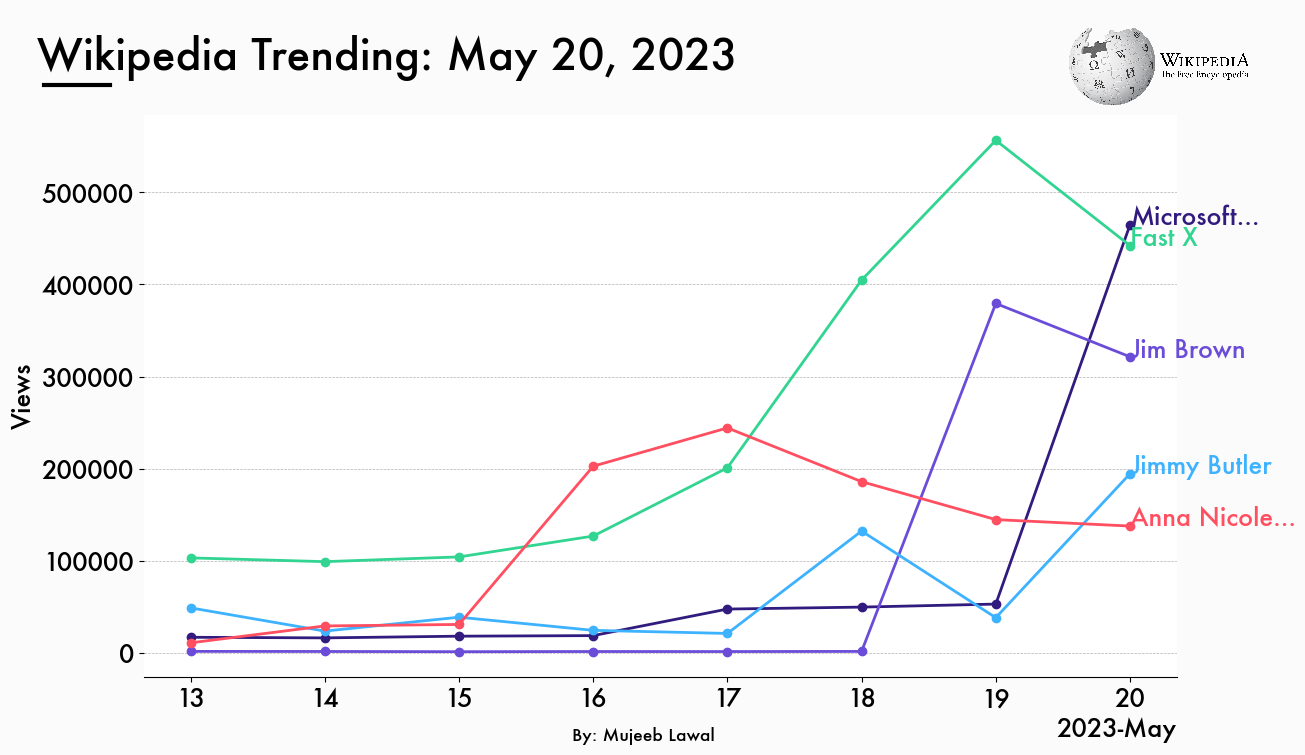

In [6]:
from plot_data import plot_line_chart

fig = plot_line_chart(df)

In [7]:
fig.savefig("chart.pdf")

In [8]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.llms import OpenAI

# First, let's load the language model we're going to use to control the agent.
llm = OpenAI(temperature=0)

# Next, let's load some tools to use. Note that the `llm-math` tool uses an LLM, so we need to pass that in.
tools = load_tools(["serpapi", "wikipedia"], llm=llm)


# Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=False)

# Now let's test it out!
# query = "Bishop Briggs"
# text = agent.run(f"Why was {query} trending yesterday?, please provide as much context as possible")

Could not import azure.core python package.


In [9]:
topics = []
texts = []
for article in top_5_trending:
    topic = article.replace('_',' ')
    topics.append(topic)
    text = agent.run(f"Why was {topic} trending yesterday?, please provide as much context as possible")
    texts.append(text)

/Users/mujeeblawal/Portfolio/AutomatedReports/venv/lib/python3.9/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/mujeeblawal/Portfolio/AutomatedReports/venv/lib/python3.9/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [10]:
texts

['Microsoft announced new AI solutions for Windows yesterday.',
 'Jim Brown was trending yesterday due to his death at the age of 87. He was an American football fullback, civil rights activist, and actor who played for the Cleveland Browns of the National Football League (NFL) from 1957 through 1965. He was widely considered one of the greatest running backs of all time, as well as one of the greatest players in NFL history, and was inducted into the Pro Football Hall of Fame in 1971. He was also an actor and civil rights activist. Jim Browning is a YouTuber from Northern Ireland whose content focuses on scam baiting and investigating call centres engaging in fraudulent activities.',
 'Jimmy Butler was trending yesterday because he made Grant Williams, a player for the Boston Celtics, pay for poking him during a game.',
 'Fast X was trending yesterday due to the release of the tenth installment in the Fast & Furious franchise, which is called Fast X and was released on May 19, 2023. I

In [11]:
# Generate Images

from image_generator import get_image

image_paths = [get_image(topic) for topic in topics]

Image saved successfully at Microsoft_Windows.jpg
Image resized and saved successfully.
Image saved successfully at Jim_Brown.jpg
Image resized and saved successfully.
Image saved successfully at Jimmy_Butler.jpg
Image resized and saved successfully.
Image saved successfully at Fast_X.jpg
Image resized and saved successfully.
Image saved successfully at Anna_Nicole_Smith.jpg
Image resized and saved successfully.


In [12]:
import matplotlib.pyplot as plt
from presentation import DocGenerator
from textwrap import shorten, wrap

In [13]:
for image_path, text, heading in zip(image_paths, texts, topics):
    fig = plt.figure(FigureClass=DocGenerator, image_path=image_path, text=text, heading=heading)
    fig.savefig(f"{heading.replace(' ','_')}.pdf")

<DocGenerator size 1333.3x750 with 0 Axes>

<DocGenerator size 1333.3x750 with 0 Axes>

<DocGenerator size 1333.3x750 with 0 Axes>

<DocGenerator size 1333.3x750 with 0 Axes>

<DocGenerator size 1333.3x750 with 0 Axes>

In [16]:
from PyPDF2 import PdfMerger

def merge_pdfs(pdfs, newfilename):
    merger = PdfMerger()

    for pdf in pdfs:
        merger.append(pdf)

    merger.write(newfilename)
    merger.close

pdfs = ['chart.pdf'] + [f"{heading.replace(' ','_')}.pdf" for heading in topics]
merge_pdfs(pdfs, newfilename="Trending_Yesterday.pdf")